In [42]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV


In [43]:
a, b, c = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
lst = [a, b, c]
del a, b, c # dfs still in list
del lst     # memory release now

In [44]:
df1=pd.read_csv(r"C:\Users\Vinit M.P\Downloads\#DATAHACK\black friday\train_oSwQCTC\train.csv")
df2=pd.read_csv(r"C:\Users\Vinit M.P\Downloads\#DATAHACK\black friday\test_HujdGe7\test.csv")

In [46]:
df1.shape

(550068, 12)

In [47]:
df1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [48]:
df1.dtypes


User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [50]:
df2.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

Imputing the categorical values for our conviences

In [52]:
df1['Product_Category_2'].mean()

9.842329251122386

In [53]:
df1['Product_Category_2']=df1['Product_Category_2'].fillna(df1['Product_Category_2'].median())
df1['Product_Category_3']=df1['Product_Category_3'].fillna(0)
df2['Product_Category_2']=df2['Product_Category_2'].fillna(df2['Product_Category_2'].median())
df2['Product_Category_3']=df2['Product_Category_3'].fillna(0)

In [54]:
df1.rename(columns={'Stay_In_Current_City_Years':'residence_since'}, inplace=True)
df2.rename(columns={'Stay_In_Current_City_Years':'residence_since'}, inplace=True)

In [55]:
df1[["Product_Category_2","Product_Category_3"]] =df1[["Product_Category_2","Product_Category_3"]].astype(int)
df2[["Product_Category_2","Product_Category_3"]] =df2[["Product_Category_2","Product_Category_3"]].astype(int)

In [56]:
def residence():
    global df1
    df1['residence_since']=df1['residence_since'].map({'4+':4,'3':3,'2':2,'1':1,'0':0})
    global df2
    df2['residence_since']=df2['residence_since'].map({'4+':4,'3':3,'2':2,'1':1,'0':0})


In [57]:
def cat():
    global df1
    df1['City_Category']=df1['City_Category'].map({'A':1, 'B':2, 'C':3})
    global df2
    df2['City_Category']=df2['City_Category'].map({'A':1, 'B':2, 'C':3})

In [58]:
def ger():
    global df1,df2
    df1['kids']=df1["Age"].map(lambda d:1 if d=='0-17' else 0)
    df1['youth']=df1["Age"].map(lambda d:1 if d=='18-25' else 0)
    df1['Adults']=df1["Age"].map(lambda d:1 if d=='26-35' else 0)
    df1['midage']=df1["Age"].map(lambda d:1 if d=='36-45' else 0)
    df1['oldage']=df1["Age"].map(lambda d:1 if d=='46-50' else 0)
    df1['elderly']=df1["Age"].map(lambda d:1 if d=='51-55' else 0)
    df1['senior']=df1["Age"].map(lambda d:1 if d=='55+' else 0)
    df2['kids']=df2["Age"].map(lambda d:1 if d=='0-17' else 0)
    df2['youth']=df2["Age"].map(lambda d:1 if d=='18-25' else 0)
    df2['Adults']=df2["Age"].map(lambda d:1 if d=='26-35' else 0)
    df2['midage']=df2["Age"].map(lambda d:1 if d=='36-45' else 0)
    df2['oldage']=df2["Age"].map(lambda d:1 if d=='46-50' else 0)
    df2['elderly']=df2["Age"].map(lambda d:1 if d=='51-55' else 0)
    df2['senior']=df2["Age"].map(lambda d:1 if d=='55+' else 0)

In [59]:
def ger1():
    global df1
    df1['Age']=df1["Age"].map({'18-25':1, '26-35':2, '36-45':3,'46-50':4,'51-55':5,'55+':6, '0-17':0})
    df2['Age']=df2["Age"].map({'18-25':1, '26-35':2, '36-45':3,'46-50':4,'51-55':5,'55+':6, '0-17':0})

In [60]:
def gender():
    global df1
    df1['Gender']=df1['Gender'].map({'M':1, 'F':0})
    df2['Gender']=df2['Gender'].map({'M':1, 'F':0})

In [61]:
gender()

In [62]:
cat()

In [63]:
ger()

In [64]:
residence()

In [65]:
ger1()

Studying the correlation between the given independent variables and depedent variables.

Text(0.5, 1, 'Correlation between features')

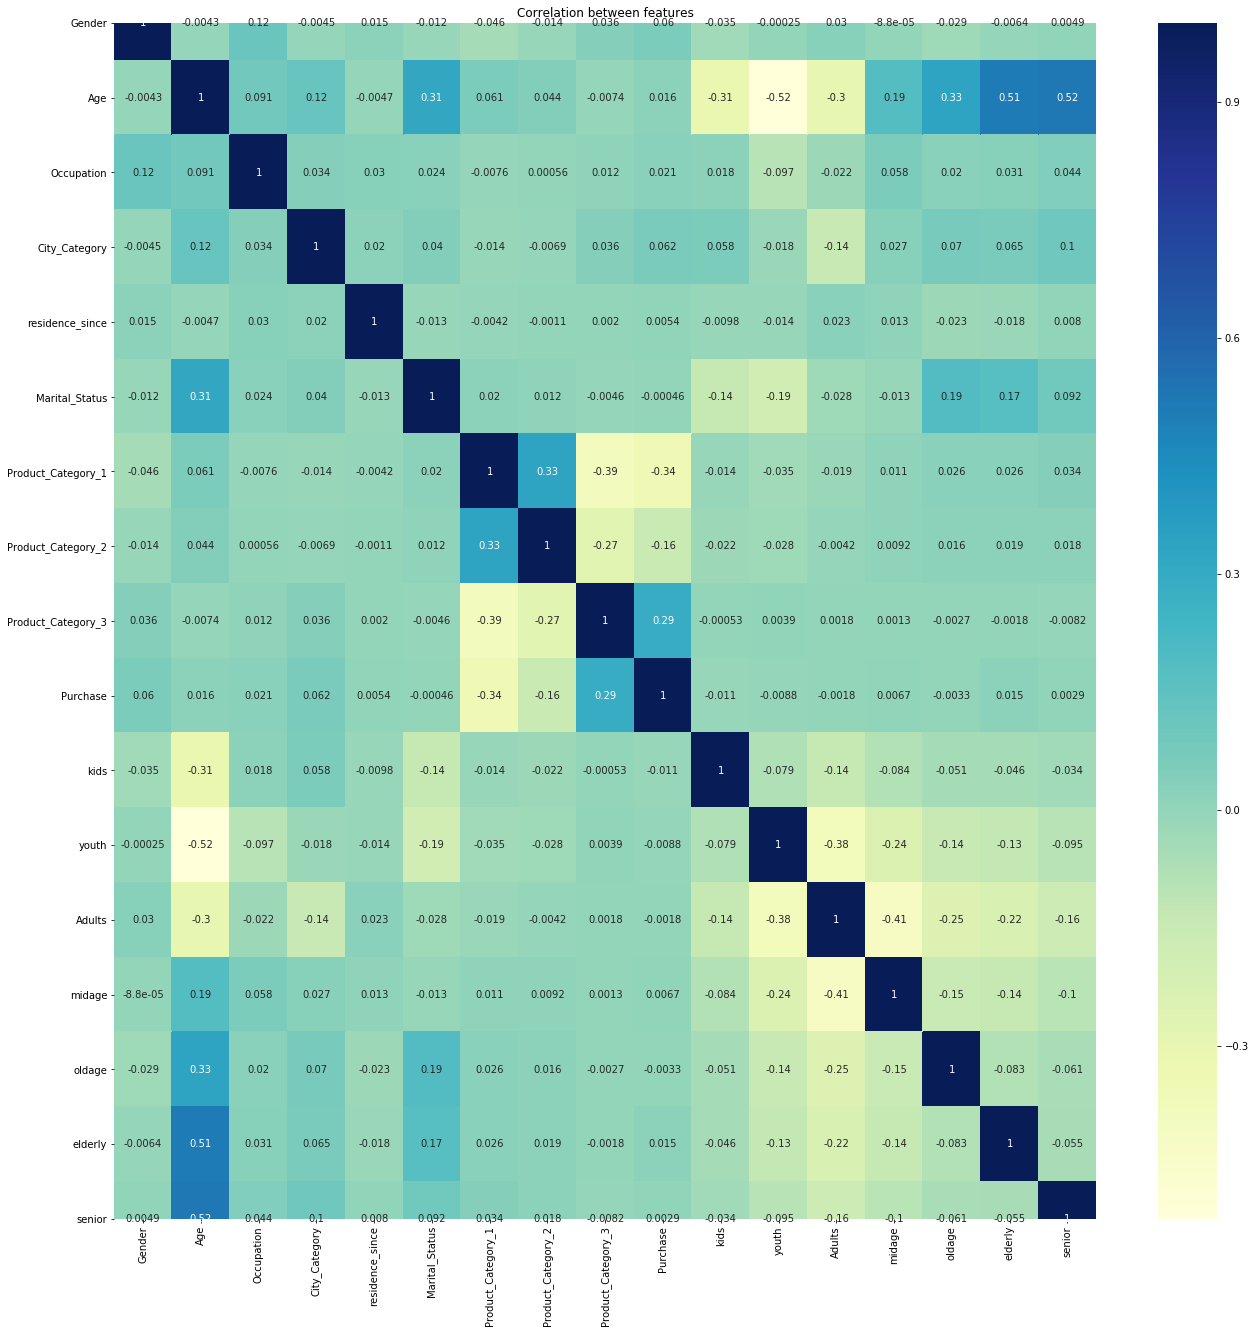

In [66]:
fig, ax = plt.subplots(figsize=(22,22))
sns.heatmap(df1.drop("User_ID", axis=1).corr(), annot=True, cmap="YlGnBu").set_title("Correlation between features") 

*from the above heat map we can infer that there is a corelation betweeen

PURCHASE vs Product_category_3
PURCHASE vs Product_category_2
PURCHASE vs City_Category
CLUBING together people who live in the suburbes and with the highest spending occupation

# Feature Engineering [Needs Improvement]

In [88]:
def feature():
    global df1,df2
    df1["Potential"]=(df1["City_Category"]==2) & (df1["Occupation"]==4|0|7) 
#     &(df1["Age"]==2)
    df1["Potential"]=df1["Potential"].map(lambda x:1 if x==True else 0)
    df2["Potential"]=(df2["City_Category"]==2) & (df2["Occupation"]==4|0|7)
    df2["Potential"]=df2["Potential"].map(lambda x:1 if x==True else 0)

In [68]:
def feature1():
    global df1, df2
    df1["AgeAd"]=(df1["Age"]==2)&(df1["Gender"]==1)
    df1["AgeAd"]=df1["AgeAd"].map(lambda x:1 if x==True else 0)
    df2["AgeAd"]=(df2["Age"]==2)&(df2["Gender"]==1)
    df2["AgeAd"]=df2["AgeAd"].map(lambda x:1 if x==True else 0)

In [69]:
feature1()

In [70]:
feature()

# Data Analysis

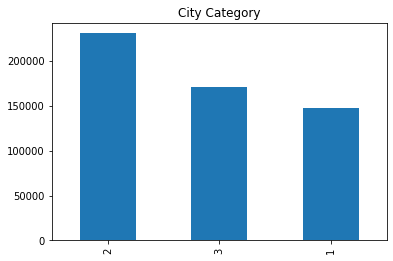

In [72]:
df1["City_Category"].value_counts().plot(kind='bar',title="City Category")


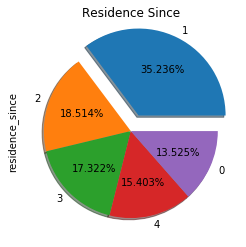

In [73]:
df1["residence_since"].value_counts().plot.pie(title="Residence Since", explode=(0.2,0,0,0,0),autopct="%1.3f%%", shadow=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

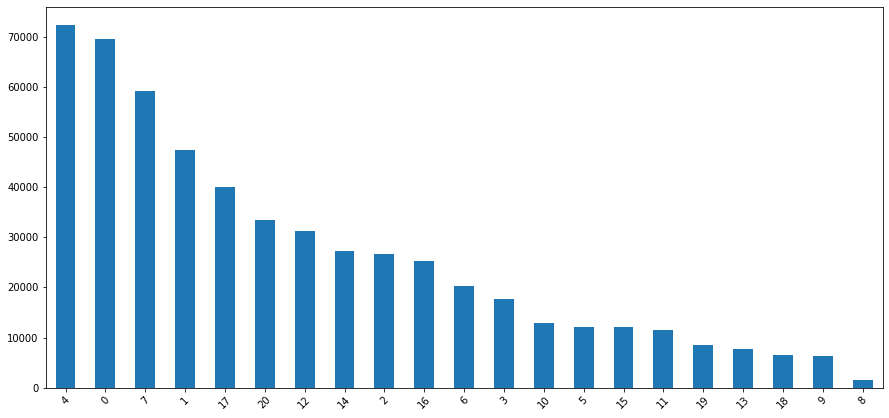

In [74]:
df1['Occupation'].value_counts().plot(kind='bar', figsize=(15,7))
plt.xticks(rotation=45)

* Occupation number 4 comes out as the highest spender with value counts of over 70000, and the trend seems to be tailing towards the right ending with occupation number 8.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

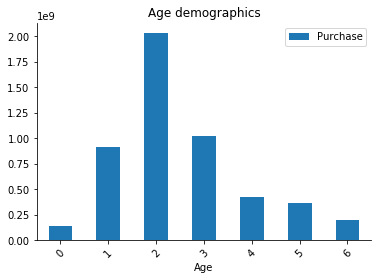

In [75]:
df1.groupby(['Age']).sum()[["Purchase"]].plot(kind='bar', title='Age demographics')
# df1.groupby(['Purchase']).sum()[["Age"]].plot(kind='bar', title='Age demographics')
sns.despine()
plt.xticks(rotation=45)


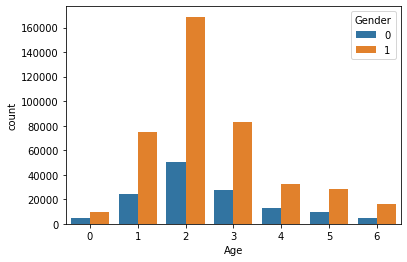

In [76]:
# sns.despine()
sns.countplot(df1["Age"], hue=df1["Gender"])


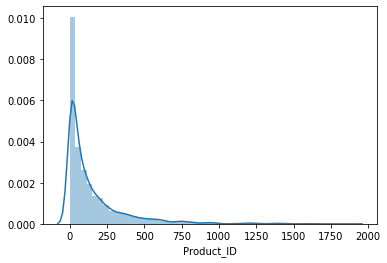

In [77]:
sns.distplot(df1['Product_ID'].value_counts())

# Fitting the Model

In [78]:
model=LinearRegression()
x=df1.drop(columns=["User_ID", "Product_ID","Purchase"])
test=df2.drop(columns=["User_ID",'Product_ID'])
y=df1["Purchase"].astype(int)

In [79]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3)
# model=LassoCV(alpha=2,normalize=True)
model=XGBRegressor(n_estimators=200,objective='reg:squarederror', subsample=0.8, colsample_bytree=1,max_depth=7)
# model=LassoCV(cv=5)
# model = LinearRegression() 
model.fit(x_train, y_train)

C:\Users\Vinit M.P\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [80]:
pred_cv=model.predict(x_cv)

In [81]:
pred_cv.astype(int)

array([ 5861, 15536,  7236, ...,  5761,  7445,  7122])

In [82]:
score=np.sqrt(mean_squared_error(y_cv,pred_cv))

In [83]:
score

2858.270624014334

In [84]:
pred_test=model.predict(test)

In [85]:
submission=pd.read_csv(r"C:\Users\Vinit M.P\Downloads\#DATAHACK\black friday\SampleSubmission.csv")

In [86]:
submission["Purchase"]=pred_test
submission[["User_ID","Product_ID"]]=df2[["User_ID","Product_ID"]]

In [87]:
pd.DataFrame(submission, columns=["Purchase","User_ID","Product_ID"]).to_csv(
    r"C:\Users\Vinit M.P\Downloads\#DATAHACK\black friday\SampleSubmission.csv", index=False)